# Notebook 기본 세팅

In [1]:
# Constant 선언

# 프로젝트 루트 디렉토리를 식별하기 위한 마커 파일 이름
ROOT_MARKER = "pyproject.toml"

# 한글 표시를 위한 나눔바른고딕 폰트 파일 이름
# matplotlib 의 font_manager 에 실제 폰트 파일의 위치를 넣어주어야 한다.
KOREAN_FONT_FILE = "NanumBarunGothic.ttf"

# matplotlib 에서는 font-family 의 이름으로 font 를 설정한다.
# 그래서 font 파일 그 자체가 아니라, 그 파일의 family 이름을 적어준다.
KOREAN_FONT_FAMILY = "NanumBarunGothic"

# 참고
# Font Family 와 Font File 의 차이는,
# Font Family 는 비슷한 디자인 특성을 공유하는 글꼴 그룹을 의미한다.
#
# 예를 들어 '나눔바른고딕' 폰트 패밀리는 일반(Regular), 굵게(Bold), 기울임(Italic) 등 여러 스타일을 포함할 수 있다.
# 반면, 폰트 파일(.ttf, .otf 등)은 이러한 폰트의 하나의 스타일이 저장된 실제 파일이다.
#
# 이 프로젝트에서는 폰트 용량을 줄이기 위해 일반(Regular) 인 NanumBarunGothic.ttf 만 사용한다.

In [2]:
# 프로젝트 root 를 sys.path 에 추가해서 import 구문을 사용하기 쉽게
from pathlib import Path


def find_project_root() -> Path:
    """
    pyproject.toml 파일을 기준으로 루트 디렉토리를 찾는다.
    :return: Path: 프로젝트 루트 디렉토리 경로
    """

    current_path = Path().resolve()

    while current_path != current_path.parent:
        if (current_path / ROOT_MARKER).exists():
            return current_path

        current_path = current_path.parent

    raise FileNotFoundError("프로젝트 루트 디렉토리를 찾을 수 없습니다.")


ROOT_DIR = find_project_root()
DATA_DIR = ROOT_DIR / "data"

In [3]:
# matplotlib 의 한글 font 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


FONTS_DATA_DIR = DATA_DIR / "fonts"


def setup_korean_font():
    font_path = FONTS_DATA_DIR / KOREAN_FONT_FILE
    fm.fontManager.addfont(font_path)

    # 폰트 설정
    plt.rcParams["font.family"] = KOREAN_FONT_FAMILY
    plt.rcParams["axes.unicode_minus"] = False


setup_korean_font()

# DocumentImageDataModule 사용해보기

In [4]:
from torchvision import transforms

from src.data.datamodules import DocumentImageDataModule

In [5]:
data_module = DocumentImageDataModule(
    batch_size=4,
    train_transform=transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ]
    ),
    test_transform=transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ]
    ),
)
data_module.prepare_data()
data_module.setup()

[2025-07-06 02:41:59] INFO [DocumentImageDataModule.prepare_data] Done preparing data.
[2025-07-06 02:42:03] INFO [DocumentImageDataModule.setup] Done setup


Shape of train image: torch.Size([4, 3, 224, 224])
Shape of train label: torch.Size([4])


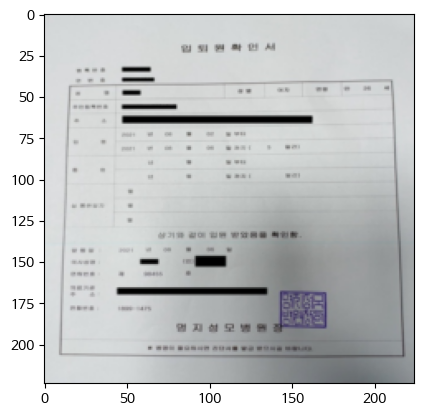

In [6]:
for images, labels in data_module.train_dataloader():
    print("Shape of train image:", images.shape)
    print("Shape of train label:", labels.shape)

    plt.imshow(images[0].numpy().transpose((1, 2, 0)))

    break

Shape of validation image: torch.Size([4, 3, 224, 224])
Shape of validation label: torch.Size([4])


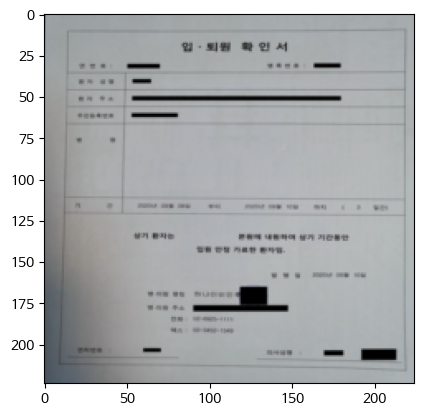

In [7]:
for images, labels in data_module.val_dataloader():
    print("Shape of validation image:", images.shape)
    print("Shape of validation label:", labels.shape)

    plt.imshow(images[0].numpy().transpose((1, 2, 0)))

    break

Shape of test image: torch.Size([4, 3, 224, 224])
Shape of test label: torch.Size([4])


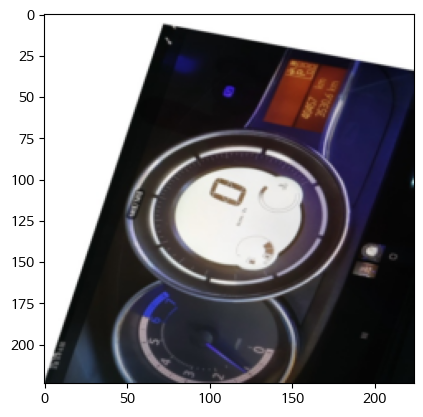

In [8]:
for images, labels in data_module.test_dataloader():
    print("Shape of test image:", images.shape)
    print("Shape of test label:", labels.shape)

    plt.imshow(images[0].numpy().transpose((1, 2, 0)))

    break

Shape of test image: torch.Size([4, 3, 224, 224])
Shape of test label: torch.Size([4])


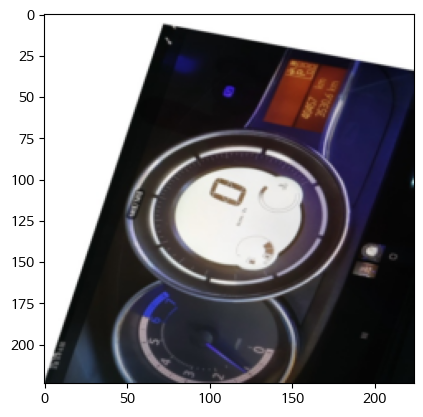

In [9]:
for images, labels in data_module.predict_dataloader():
    print("Shape of test image:", images.shape)
    print("Shape of test label:", labels.shape)

    plt.imshow(images[0].numpy().transpose((1, 2, 0)))

    break

## 각 class 비율에 맞춰 나뉘었는지 확인

In [10]:
stratified_data_module = DocumentImageDataModule(
    batch_size=4,
    train_transform=transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ]
    ),
    test_transform=transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ]
    ),
    stratify=True,
)
stratified_data_module.prepare_data()
stratified_data_module.setup()

[2025-07-06 02:42:03] INFO [DocumentImageDataModule.prepare_data] Done preparing data.
[2025-07-06 02:42:06] INFO [DocumentImageDataModule.setup] Done setup


In [11]:
target_count = {}
for _, labels in stratified_data_module.val_dataloader():
    for label in labels:
        target_count[label.item()] = target_count.get(label.item(), 0) + 1

In [12]:
import pandas as pd


df = pd.DataFrame(list(target_count.items()), columns=["key", "value"]).set_index("key").sort_index()
df

,value
key,
0,20
1,9
2,20
3,20
4,20
5,20
6,20
7,20
8,20


- 각 class 의 비율에 맞게 validation dataset 이 만들어짐